<a href="https://colab.research.google.com/github/Jeongmin-heo/tobigs_assignment/blob/master/week8_assignment2_heojeongmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
ls

drive/  sample_data/


In [13]:
cd /content/drive/My Drive/colab_workspace

/content/drive/My Drive/colab_workspace


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt

In [15]:
#데이터셋 설정
train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range =0.2,
zoom_range=0.2, horizontal_flip =True, vertical_flip = True)

train_generator = train_datagen.flow_from_directory(
'train',
target_size=(224, 224),
batch_size=128,
class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range =0.2,
zoom_range=0.2, horizontal_flip =True, vertical_flip = True)

test_generator = train_datagen.flow_from_directory(
'test',
target_size=(224, 224),
batch_size=128,
class_mode='binary')

Found 1002 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [16]:
#알렉스넷 모델 생성
model = Sequential()

#Alexnet - 계층 1 : 11x11 필터를 96개를 사용, strides = 4, 활화화함수 = relu,
# 입력 데이터 크기 224x224 , 3x3 크기의 풀리계층 사용

model.add(Conv2D(96, (11,11), strides=4, input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(BatchNormalization())

#Alexnet - 계층 2 : 5X5 필터를 256개 사용 , strides = 1, 활화화함수 = relu, 3x3 크기의 풀리계층 사용
model.add(ZeroPadding2D(2))
model.add(Conv2D(256,(5,5), strides=1, activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(BatchNormalization())

#Alexnet - 계층 3 : 3x3 필터를 384개 사용, strides =1 , 활성화함수 = relu
model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))


#Alexnet - 계층 4 : 3x3 필터를 384개 사용, strides =1 , 활성화함수 = relu
model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))


#Alexnet - 계층 5 : 3x3 필터를 256개 사용, strides =1 , 활성화함수 = relu, 3x3 크기의 풀리계층 사용
model.add(ZeroPadding2D(1))
model.add(Conv2D(256,(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

#계산을 위해서 1차원 배열로 전환
model.add(Flatten())

#Alexnet - 계층 6 : 4096개의 출력뉴런, 활성화함수 = relu
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

#Alexnet - 계층 7 : 4096게의 출력뉴런, 활성화함수 = relu
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

#Alexnet - 계층 8 : 1개의 출력뉴런, 활성화함수 = sigmoid
model.add(Dense(1, activation='sigmoid'))

#학습과정 설정 - 손실함수는 크로스엔트로피, 가중치 검색은 아담
sgd = SGD(lr=0.01,decay=5e-4, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

model.summary() #Summary를 통해 확인













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 96)        384       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_____________________________

In [23]:
#Alexnet - 학습하기
hist = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,validation_steps=10)#validation_data=val_generator, validation_steps=1)

Epoch 1/20
100/100 [==============================] - 192s 2s/step - loss: 0.5467 - acc: 0.7186
Epoch 2/20
100/100 [==============================] - 188s 2s/step - loss: 0.5251 - acc: 0.7400
Epoch 3/20
100/100 [==============================] - 188s 2s/step - loss: 0.5071 - acc: 0.7519
Epoch 4/20
100/100 [==============================] - 188s 2s/step - loss: 0.4915 - acc: 0.7616
Epoch 5/20
100/100 [==============================] - 186s 2s/step - loss: 0.4787 - acc: 0.7726
Epoch 6/20
100/100 [==============================] - 186s 2s/step - loss: 0.4663 - acc: 0.7768
Epoch 7/20
100/100 [==============================] - 188s 2s/step - loss: 0.4496 - acc: 0.7896
Epoch 8/20
100/100 [==============================] - 191s 2s/step - loss: 0.4449 - acc: 0.7928
Epoch 9/20
100/100 [==============================] - 191s 2s/step - loss: 0.4143 - acc: 0.8133
Epoch 10/20
100/100 [==============================] - 192s 2s/step - loss: 0.4095 - acc: 0.8122
Epoch 11/20
100/100 [==================

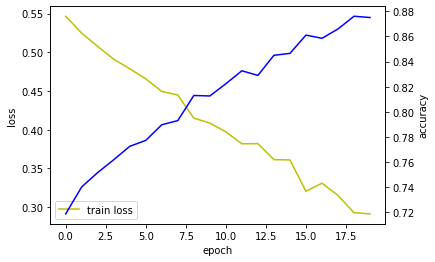

In [27]:
#Alexnet - 그래프 그리기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')

acc_ax.plot(hist.history['acc'],'b',label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')

plt.show()

In [25]:
#모델 평가하기
print("-------------Evaluate-----------------")
scores = model.evaluate_generator(test_generator,steps=1)
print("%s : %.2f%%" %(model.metrics_names[1],scores[1]*100))


-------------Evaluate-----------------
acc : 75.00%
